## *Parameter Extraction EDA*
### **Project Psychophysiology - winter semester 2024/25**

### Team NeuroU-bahnismus

#### Seunghui Ko, Jonas Ebert, Luca Strasser





Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_empty-bright_eda.csv


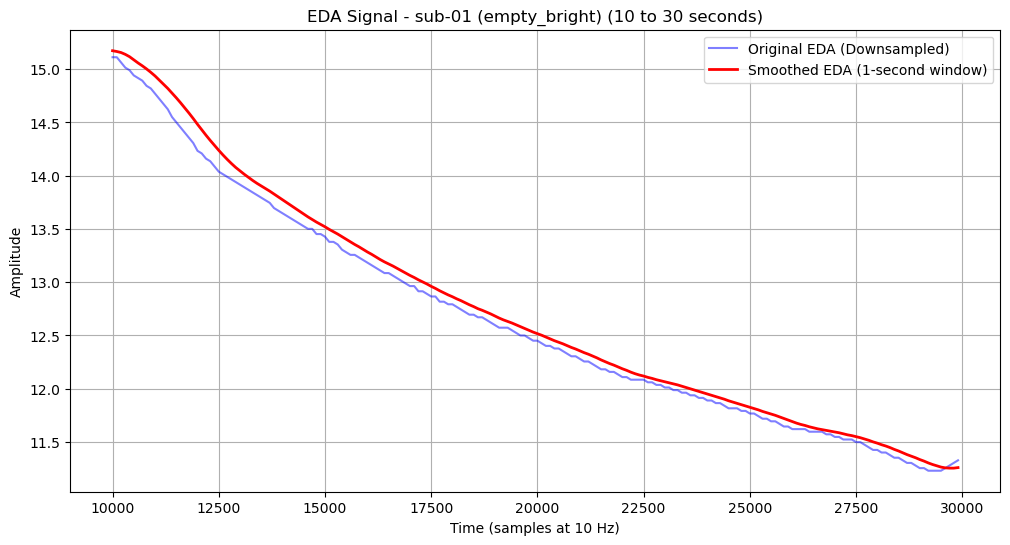

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_empty-bright_eda.csv
Original shape: 299000
Downsampled shape: 2990
Moving average shape: 2990

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_empty-dark_eda.csv


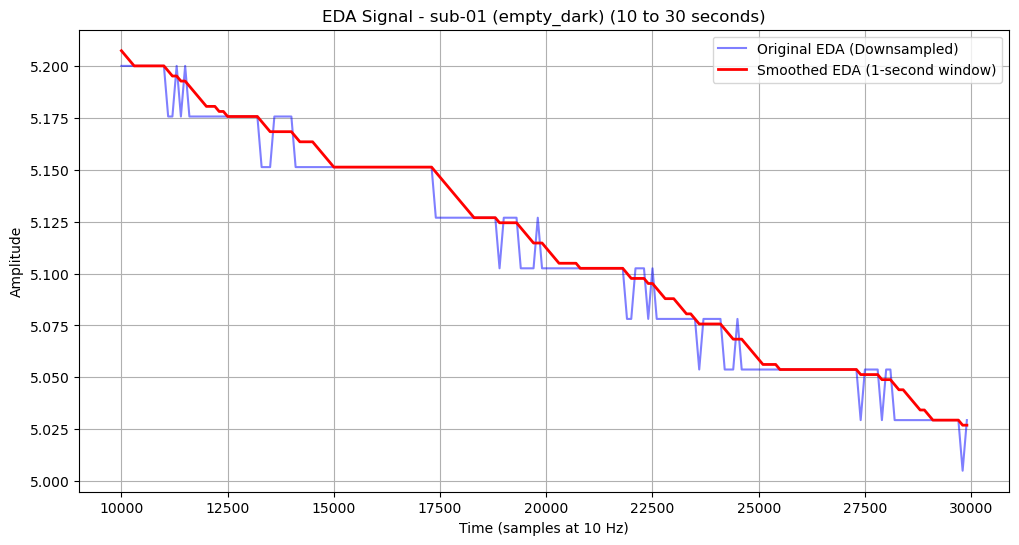

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_empty-dark_eda.csv
Original shape: 240000
Downsampled shape: 2400
Moving average shape: 2400

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_full-bright_eda.csv


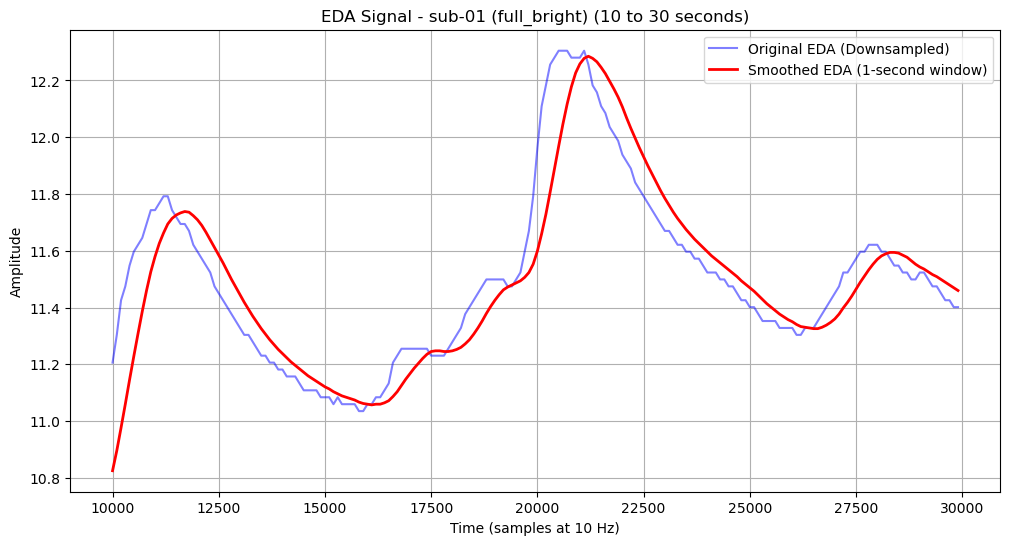

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_full-bright_eda.csv
Original shape: 299000
Downsampled shape: 2990
Moving average shape: 2990

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_full-dark_eda.csv


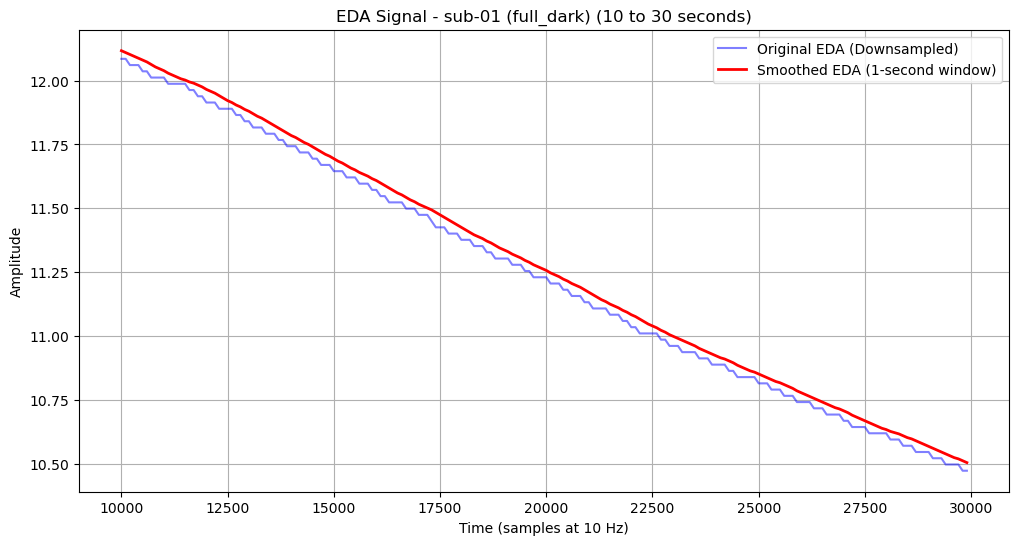

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_full-dark_eda.csv
Original shape: 240000
Downsampled shape: 2400
Moving average shape: 2400

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_empty-bright_eda.csv


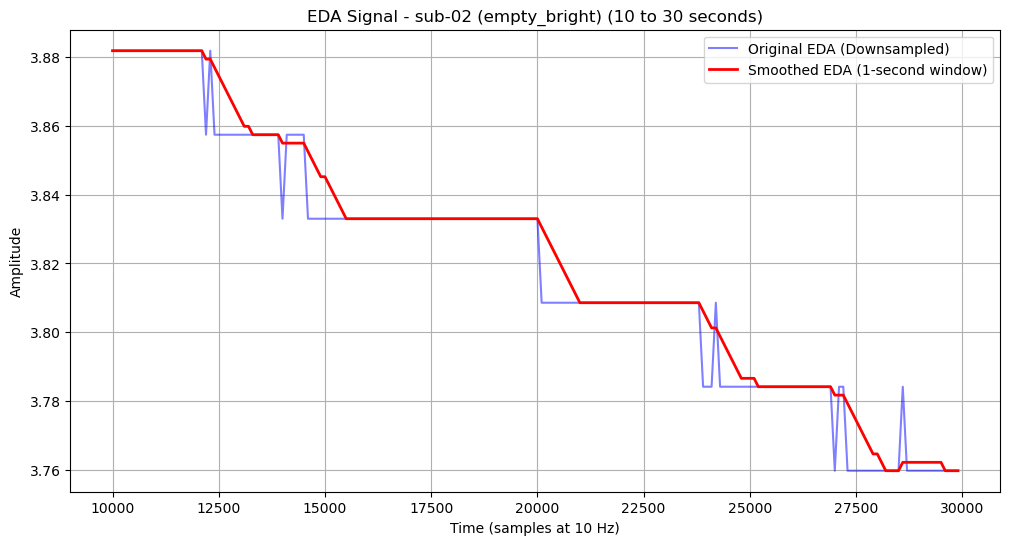

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_empty-bright_eda.csv
Original shape: 299000
Downsampled shape: 2990
Moving average shape: 2990

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_empty-dark_eda.csv


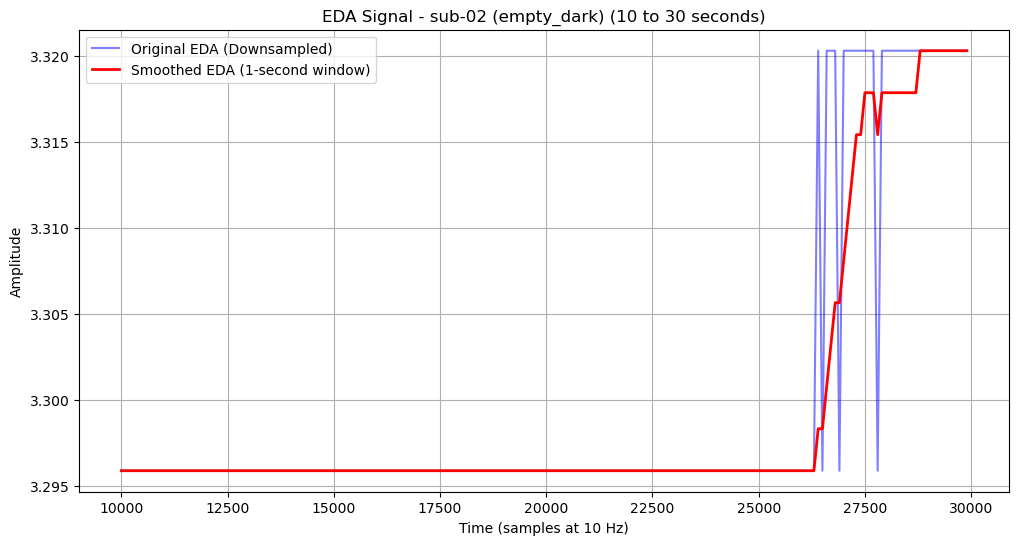

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_empty-dark_eda.csv
Original shape: 240000
Downsampled shape: 2400
Moving average shape: 2400

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_full-bright_eda.csv


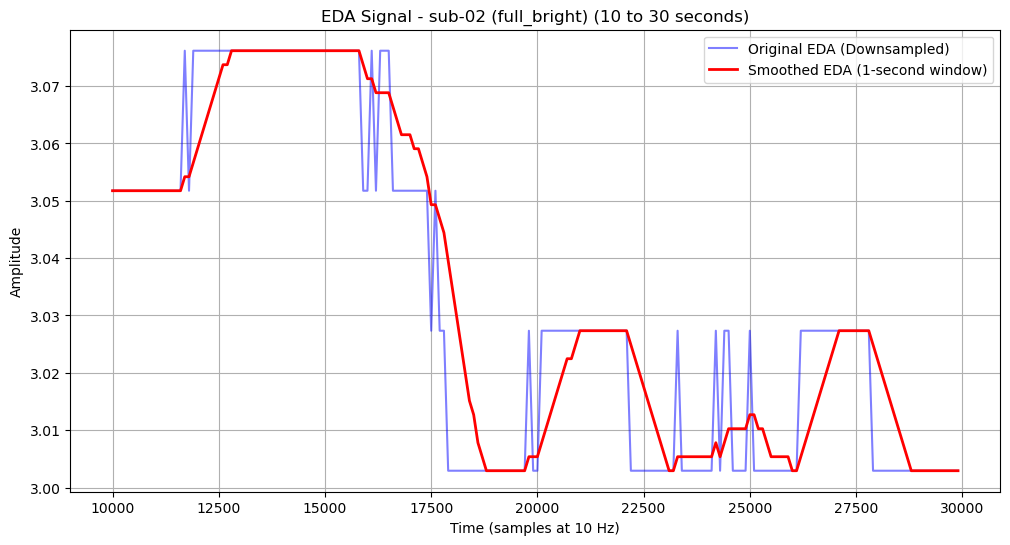

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_full-bright_eda.csv
Original shape: 299000
Downsampled shape: 2990
Moving average shape: 2990

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_full-dark_eda.csv


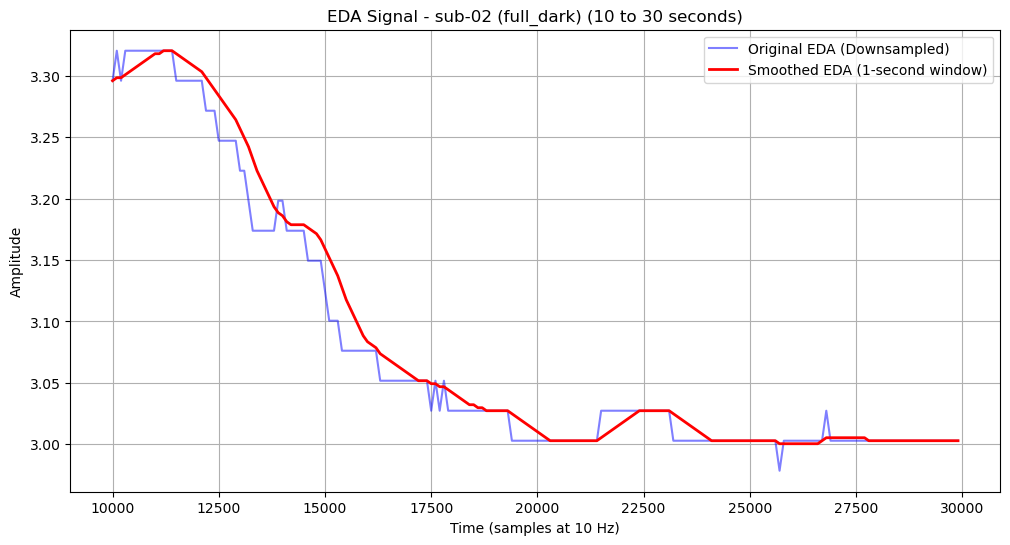

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-02_full-dark_eda.csv
Original shape: 240000
Downsampled shape: 2400
Moving average shape: 2400

Preprocessed EDA data saved to: /Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data//preprocessed_eda.pkl


In [6]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import os
import pickle

# File paths
raw_data_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/'
derivative_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/'

# Parameters
participants = ['sub-01', 'sub-02']
conditions1 = ['empty', 'full']
conditions2 = ['bright', 'dark']

# List to store all processed data
all_processed_eda = []

# Process each participant and condition
for pi in participants:
    for c1 in conditions1:
        for c2 in conditions2:
            # Assemble file name
            filename = f"{raw_data_folder}/{pi}_{c1}-{c2}_eda.csv"
            print(f'\nProcessing: {filename}')

            try:
                # Read EDA data
                eda_data = pd.read_csv(filename)

                # Select EDA column
                if 'EDA (µS)' in eda_data.columns:
                    eda_data = eda_data[['EDA (µS)']].copy()
                else:
                    raise KeyError("Column 'EDA (µS)' not found in the file")

                # Downsample from 1000 Hz to 10 Hz
                downsample_factor = 100  # From 1000 Hz to 10 Hz
                eda_data_downsampled = eda_data.iloc[::downsample_factor]

                # Apply moving average (1-second window at 10 Hz)
                window_size = 10  # 1-second window for smoothing
                eda_data_movav = eda_data_downsampled['EDA (µS)'].rolling(window=window_size).mean()

                # Store processed data
                processed_data = {
                    'participant': pi,
                    'condition': f"{c1}_{c2}",
                    'raw_downsampled': eda_data_downsampled,
                    'smoothed': eda_data_movav
                }
                all_processed_eda.append(processed_data)

                # Plot a segment (10 to 30 seconds) for visualization
                sampling_rate = 10  # Hz
                start_index = 10 * sampling_rate
                end_index = 30 * sampling_rate

                # Extract subsets
                subset = eda_data_downsampled.iloc[start_index:end_index].copy()
                movavsubset = eda_data_movav.iloc[start_index:end_index].copy()

                # Create plot
                plt.figure(figsize=(12, 6))
                plt.plot(subset['EDA (µS)'], 
                         label='Original EDA (Downsampled)',
                         alpha=0.5, color='blue')
                plt.plot(movavsubset,
                         label='Smoothed EDA (1-second window)',
                         color='red', linewidth=2)

                plt.title(f"EDA Signal - {pi} ({c1}_{c2}) (10 to 30 seconds)")
                plt.xlabel("Time (samples at 10 Hz)")
                plt.ylabel("Amplitude")
                plt.legend()
                plt.grid(True)
                plt.show()

                print(f"Processed {filename}")
                print(f"Original shape: {len(eda_data)}")
                print(f"Downsampled shape: {len(eda_data_downsampled)}")
                print(f"Moving average shape: {len(eda_data_movav)}")

            except FileNotFoundError:
                print(f'File not found: {filename}')
                continue
            except Exception as e:
                print(f'Error processing {filename}: {str(e)}')
                continue

# Create preprocessed data directory if it doesn't exist
os.makedirs(derivative_folder, exist_ok=True)


# Save all processed data
output_filename = f"{derivative_folder}/preprocessed_eda.pkl"
with open(output_filename, 'wb') as f:
    pickle.dump(all_processed_eda, f)

print(f"\nPreprocessed EDA data saved to: {output_filename}")


Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/sub-01_baseline_eda.csv


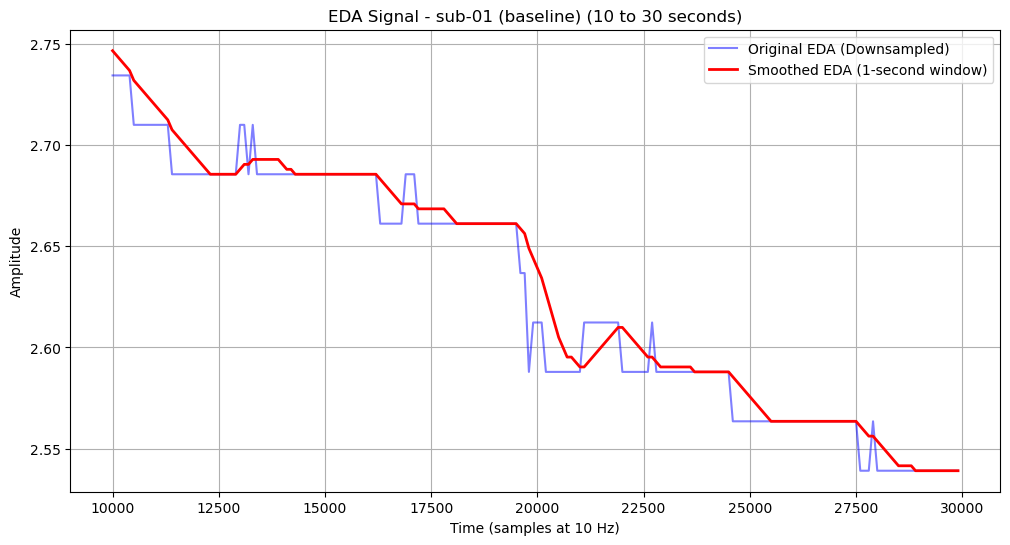

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/sub-01_baseline_eda.csv
Original shape: 323100
Downsampled shape: 3231
Moving average shape: 3231

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/sub-02_baseline_eda.csv


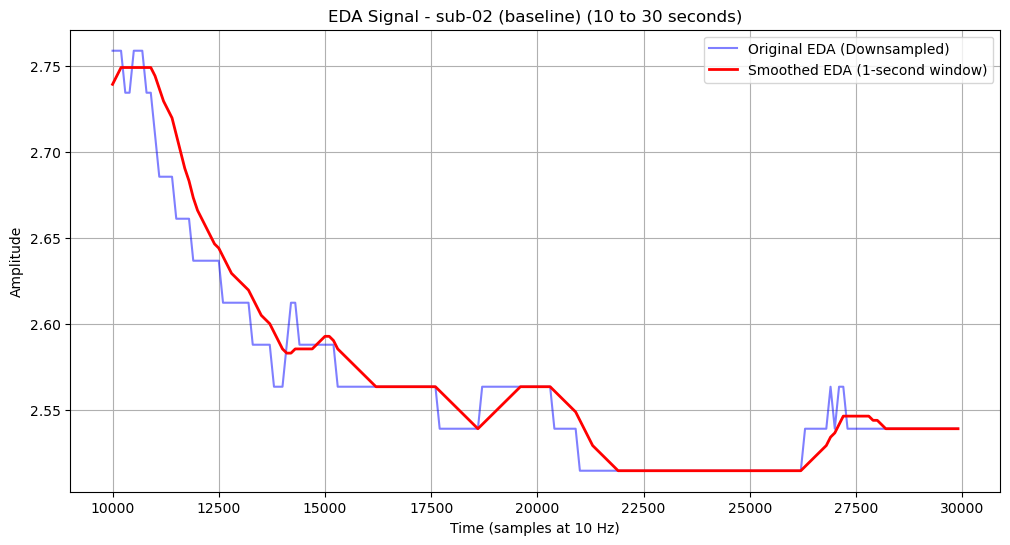

Processed /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/sub-02_baseline_eda.csv
Original shape: 282450
Downsampled shape: 2825
Moving average shape: 2825

Baseline EDA data saved to: /Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data//baseline_preprocessed_eda.pkl


In [2]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import os
import pickle

# File paths
raw_data_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/'
derivative_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/'

# Liste der Baseline-Dateien
baseline_files = [
    "sub-01_baseline_eda.csv",
    "sub-02_baseline_eda.csv"
]

# Liste zur Speicherung aller verarbeiteten Daten
all_processed_eda = []

# Verarbeitung der Baseline-Daten
for filename in baseline_files:
    file_path = os.path.join(raw_data_folder, filename)
    participant = filename.split('_')[0]
    condition = "baseline"

    print(f'\nProcessing: {file_path}')

    try:
        # EDA-Daten einlesen
        eda_data = pd.read_csv(file_path)

        # Wähle die EDA-Spalte
        if 'EDA (µS)' in eda_data.columns:
            eda_data = eda_data[['EDA (µS)']].copy()
        else:
            raise KeyError("Column 'EDA (µS)' not found in the file")

        # Downsampling von 1000 Hz auf 10 Hz
        downsample_factor = 100  # Von 1000 Hz auf 10 Hz
        eda_data_downsampled = eda_data.iloc[::downsample_factor]

        # Gleitender Durchschnitt (1-Sekunden-Fenster bei 10 Hz)
        window_size = 10  # 1-Sekunden-Fenster
        eda_data_movav = eda_data_downsampled['EDA (µS)'].rolling(window=window_size).mean()

        # Verarbeitete Daten speichern
        processed_data = {
            'participant': participant,
            'condition': condition,
            'raw_downsampled': eda_data_downsampled,
            'smoothed': eda_data_movav
        }
        all_processed_eda.append(processed_data)

        # Visualisierung eines Segments (10 bis 30 Sekunden)
        sampling_rate = 10  # Hz
        start_index = 10 * sampling_rate
        end_index = 30 * sampling_rate

        # Subsets extrahieren
        subset = eda_data_downsampled.iloc[start_index:end_index].copy()
        movavsubset = eda_data_movav.iloc[start_index:end_index].copy()

        # Plot erstellen
        plt.figure(figsize=(12, 6))
        plt.plot(subset['EDA (µS)'], 
                 label='Original EDA (Downsampled)',
                 alpha=0.5, color='blue')
        plt.plot(movavsubset,
                 label='Smoothed EDA (1-second window)',
                 color='red', linewidth=2)

        plt.title(f"EDA Signal - {participant} ({condition}) (10 to 30 seconds)")
        plt.xlabel("Time (samples at 10 Hz)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Processed {file_path}")
        print(f"Original shape: {len(eda_data)}")
        print(f"Downsampled shape: {len(eda_data_downsampled)}")
        print(f"Moving average shape: {len(eda_data_movav)}")

    except FileNotFoundError:
        print(f'File not found: {file_path}')
        continue
    except Exception as e:
        print(f'Error processing {file_path}: {str(e)}')
        continue

# Erstelle den Ordner für vorverarbeitete Daten, falls nicht vorhanden
os.makedirs(derivative_folder, exist_ok=True)

# Speichere alle verarbeiteten Daten
output_filename = f"{derivative_folder}/baseline_preprocessed_eda.pkl"
with open(output_filename, 'wb') as f:
    pickle.dump(all_processed_eda, f)

print(f"\nBaseline EDA data saved to: {output_filename}")


In [8]:

import pandas as pd  
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt
import pickle

# File path to the pickle file
output_filename = derivative_folder + 'preprocessed_eda.pkl'

# Load the pickle file
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)
    
# Display the loaded data
print(loaded_data)

[{'participant': 'sub-01', 'condition': 'empty_bright', 'raw_downsampled':         EDA (µS)
0       9.326172
100     9.326172
200     9.326172
300     9.301758
400     9.301758
...          ...
298500  5.322266
298600  5.322266
298700  5.297852
298800  5.322266
298900  5.297852

[2990 rows x 1 columns], 'smoothed': 0              NaN
100            NaN
200            NaN
300            NaN
400            NaN
            ...   
298500    5.322266
298600    5.322266
298700    5.319824
298800    5.319824
298900    5.317383
Name: EDA (µS), Length: 2990, dtype: float64}, {'participant': 'sub-01', 'condition': 'empty_dark', 'raw_downsampled':         EDA (µS)
0       5.297852
100     5.297852
200     5.297852
300     5.297852
400     5.297852
...          ...
239500  4.248047
239600  4.223633
239700  4.248047
239800  4.223633
239900  4.223633

[2400 rows x 1 columns], 'smoothed': 0              NaN
100            NaN
200            NaN
300            NaN
400            NaN
            ...   

Loading preprocessed EDA data...

Processing sub-01 - empty_bright
Data length: 2981 samples (298.1 seconds)
Number of SCR peaks detected: 24
Mean SCR amplitude: 0.1150


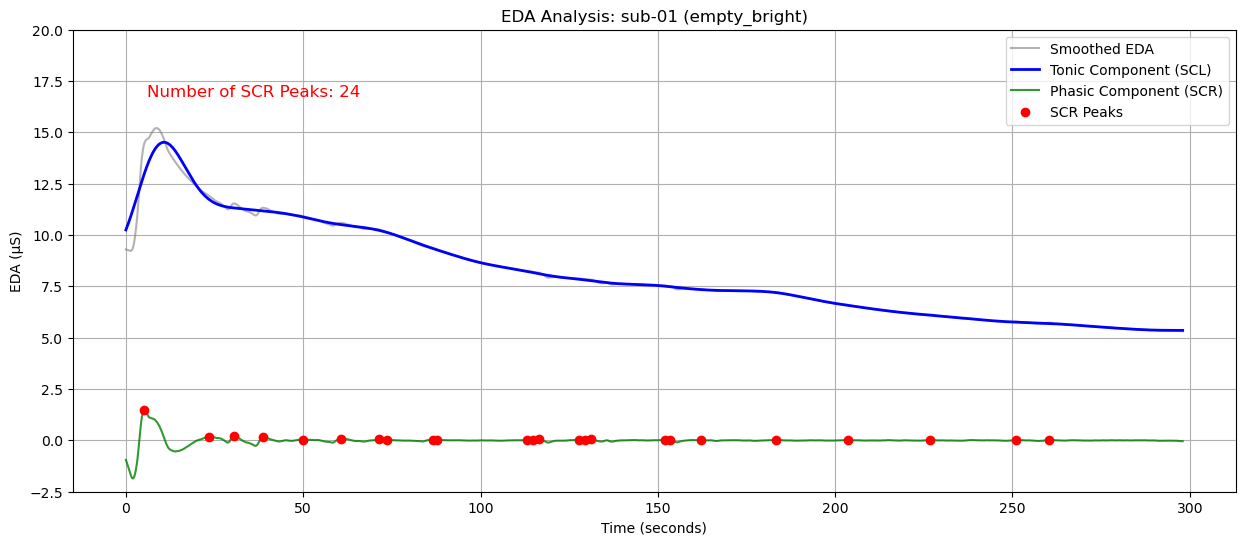


Processing sub-01 - empty_dark
Data length: 2391 samples (239.1 seconds)
Number of SCR peaks detected: 4
Mean SCR amplitude: 0.0334


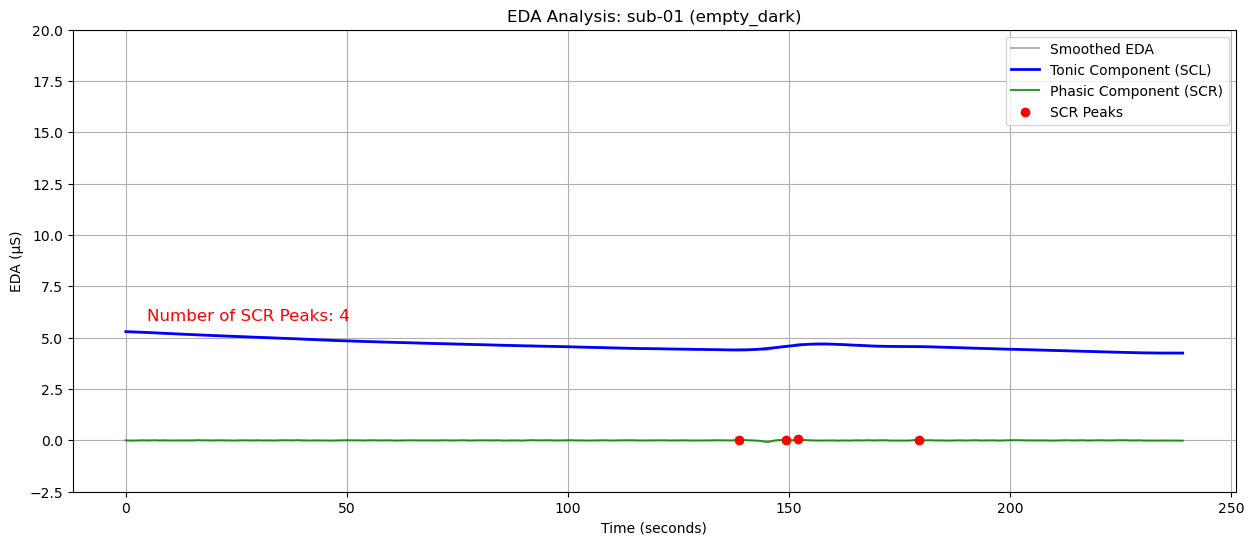


Processing sub-01 - full_bright
Data length: 2981 samples (298.1 seconds)
Number of SCR peaks detected: 34
Mean SCR amplitude: 0.2873


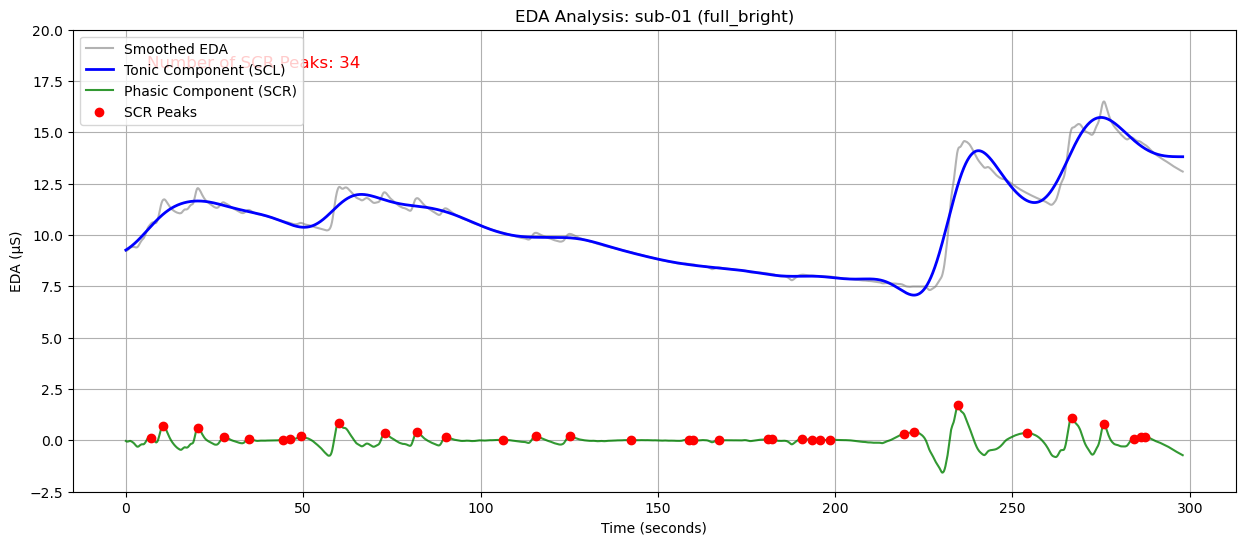


Processing sub-01 - full_dark
Data length: 2391 samples (239.1 seconds)
Number of SCR peaks detected: 27
Mean SCR amplitude: 0.1270


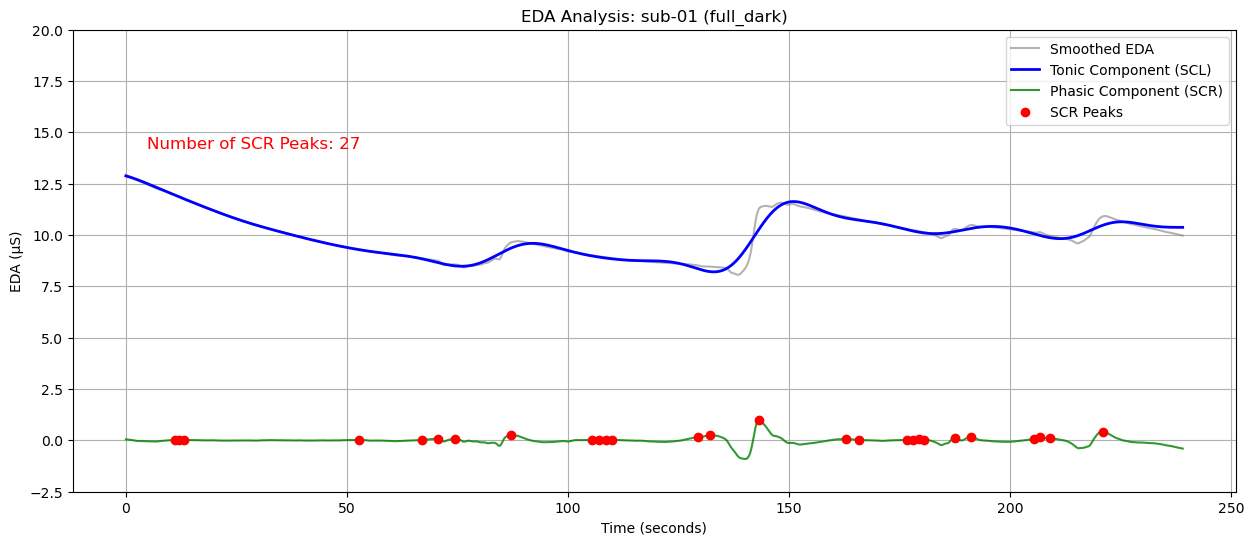


Processing sub-02 - empty_bright
Data length: 2981 samples (298.1 seconds)
Number of SCR peaks detected: 5
Mean SCR amplitude: 0.0253


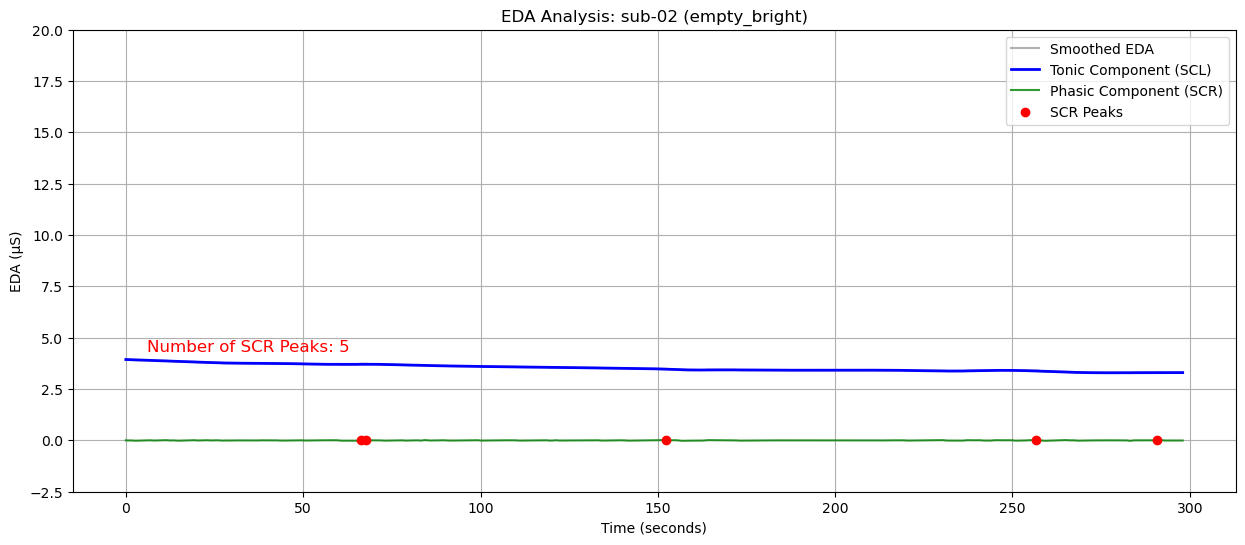


Processing sub-02 - empty_dark
Data length: 2391 samples (239.1 seconds)
Number of SCR peaks detected: 0
Mean SCR amplitude: nan


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


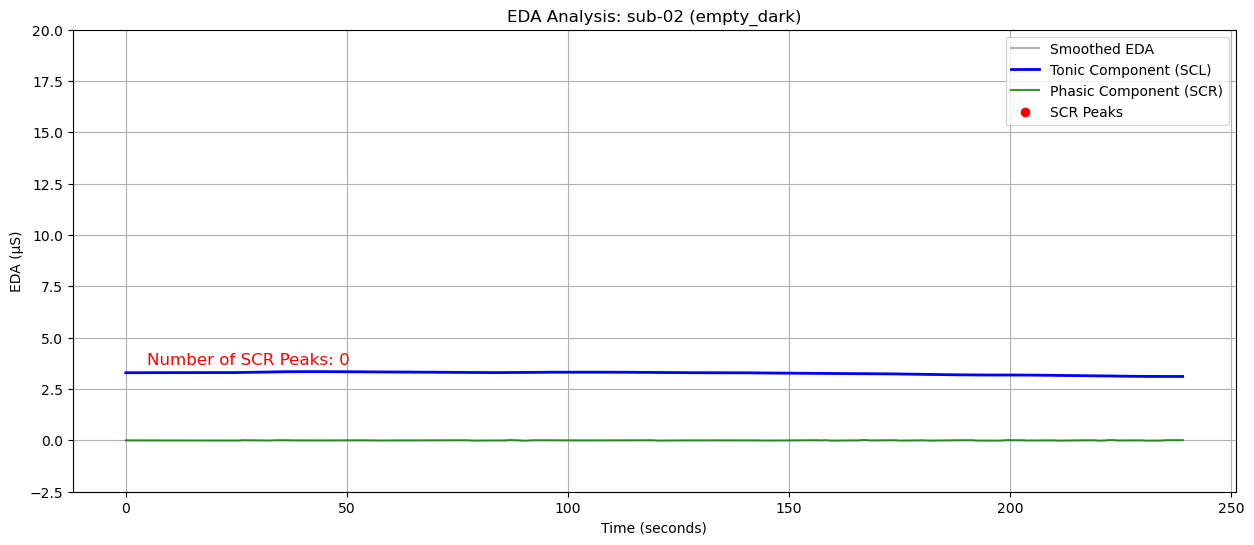


Processing sub-02 - full_bright
Data length: 2981 samples (298.1 seconds)
Number of SCR peaks detected: 17
Mean SCR amplitude: 0.0505


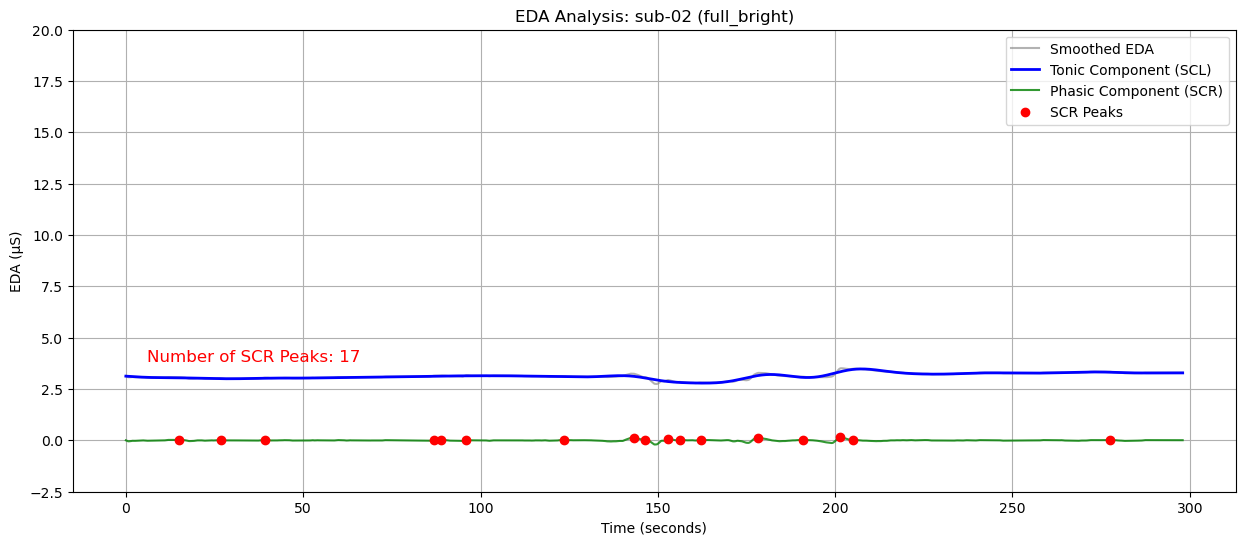


Processing sub-02 - full_dark
Data length: 2391 samples (239.1 seconds)
Number of SCR peaks detected: 12
Mean SCR amplitude: 0.2855


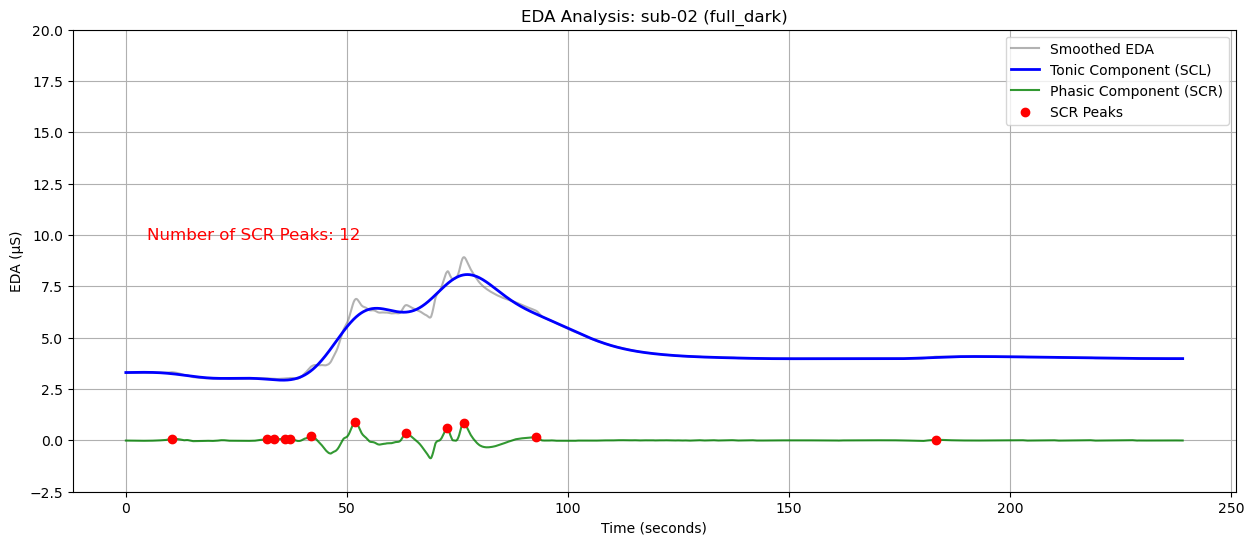


Saving processed data...
CSV file saved to /Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/eda_results.csv
Processing complete!


In [23]:

import pandas as pd
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt
import pickle

# Verzeichnis für die Ergebnisse
output_plot_dir = "/Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA"

def low_pass_filter(data, cutoff, fs, order=4):
    """Apply low-pass Butterworth filter"""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# File path
output_filename = f"{derivative_folder}/preprocessed_eda.pkl"

# Load the preprocessed data
print("Loading preprocessed EDA data...")
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)

# Parameters
sampling_frequency = 10  # Downsampled to 10 Hz
cutoff_frequency = 0.05  # Cutoff for tonic component
peak_threshold = 0.02    # Threshold for SCR detection

# Create a list to collect CSV data
csv_data = []

# Process each dataset
for participant_data in loaded_data:
    participant = participant_data['participant']
    condition = participant_data['condition']
    
    # Get smoothed EDA data and remove NaN values
    eda_data = participant_data['smoothed'].dropna().values
    time = np.arange(len(eda_data)) / sampling_frequency
    
    print(f"\nProcessing {participant} - {condition}")
    print(f"Data length: {len(eda_data)} samples ({len(eda_data)/sampling_frequency:.1f} seconds)")
    
    # 1. Extract Tonic Component (SCL)
    tonic_component = low_pass_filter(eda_data, cutoff_frequency, sampling_frequency)
    
    # 2. Extract Phasic Component (SCR)
    phasic_component = eda_data - tonic_component
    
    # 3. Detect SCR peaks
    peaks, _ = find_peaks(phasic_component, 
                         height=peak_threshold, 
                         distance=sampling_frequency)  # Minimum 1 second between peaks
    
    # Calculate SCR amplitudes
    scr_amplitudes = phasic_component[peaks]
    
    # Store results in participant_data
    participant_data['tonic_component'] = tonic_component
    participant_data['phasic_component'] = phasic_component
    participant_data['scr_peaks'] = peaks
    participant_data['scr_amplitudes'] = scr_amplitudes
    
    print(f"Number of SCR peaks detected: {len(peaks)}")
    print(f"Mean SCR amplitude: {np.mean(scr_amplitudes):.4f}")
    
    # Add data to CSV collection
    for peak, amplitude in zip(peaks, scr_amplitudes):
        csv_data.append({
            "Participant": participant,
            "Condition": condition,
            "SCR_Peak_Time": peak / sampling_frequency,  # Convert to seconds
            "SCR_Amplitude": amplitude
        })
    
    # Visualize results
    plt.figure(figsize=(15, 6))
    
    # Plot all components
    plt.plot(time, eda_data, 
             label="Smoothed EDA", alpha=0.6, color='gray')
    plt.plot(time, tonic_component, 
             label="Tonic Component (SCL)", linewidth=2, color='blue')
    plt.plot(time, phasic_component, 
             label="Phasic Component (SCR)", alpha=0.8, color='green')
    plt.scatter(peaks / sampling_frequency, scr_amplitudes, 
               color="red", label="SCR Peaks", zorder=5)
    
    plt.xlabel("Time (seconds)")
    plt.ylabel("EDA (µS)")
    plt.title(f"EDA Analysis: {participant} ({condition})")
    plt.legend()
    plt.grid(True)
    # Add number of SCR peaks to the plot
    text_x = time[len(time) // 50]  # Position the text at 10% of the time axis
    text_y = max(eda_data) * 1.1    # Position the text below the maximum EDA value
    plt.text(text_x, text_y, f"Number of SCR Peaks: {len(peaks)}", fontsize=12, color="red")
     # Set fixed y-axis limits
    plt.ylim(-2.5, 20)
    
    # Save the plot
    plot_filename = os.path.join(output_plot_dir, f"EDA_{participant}_{condition}.png")
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()


# Save updated data with EDA analysis results
print("\nSaving processed data...")
with open(output_filename, 'wb') as f:
    pickle.dump(loaded_data, f)

    # Save CSV data
csv_filename = os.path.join(output_plot_dir, "eda_results.csv")
csv_df = pd.DataFrame(csv_data)
csv_df.to_csv(csv_filename, index=False)
print(f"CSV file saved to {csv_filename}")
    
print("Processing complete!")

In [12]:

import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Paths to folders
results_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA'
os.makedirs(results_folder, exist_ok=True)

# Parameters
participants = ['sub-01', 'sub-02']
conditions1 = ['empty', 'full']
conditions2 = ['bright', 'dark']

all_results = []

# Process each participant and condition
for pi in participants:
    for c1 in conditions1:
        for c2 in conditions2:
            # Assemble file name
            filename = f"{raw_data_folder}/{pi}_{c1}-{c2}_eda.csv"
            print(f'\nProcessing: {filename}')
            
            try:
                # Read EDA data
                subdata = pd.read_csv(filename, header=None, names=['EDA'], skiprows=1)
                eda_data = subdata['EDA'].values
                
                print(f"Data length: {len(eda_data)} samples")
                
                # Process the EDA signal
                signals, info = nk.eda_process(eda_data, sampling_rate=1000)
                
                # Create figure
                fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 10))
                
                # Plot raw and cleaned signal
                ax0.plot(signals["EDA_Raw"], label="Raw", color='lightgray')
                ax0.plot(signals["EDA_Clean"], label="Cleaned", color='dodgerblue')
                ax0.set_title("Raw and Cleaned EDA Signal")
                ax0.set_ylabel("Amplitude (µS)")
                ax0.legend()
                ax0.grid(True)
                
                # Plot Phasic and Tonic components
                ax1.plot(signals["EDA_Tonic"], label="Tonic", color='red', linewidth=2)
                ax1.plot(signals["EDA_Phasic"], label="Phasic", color='green')
                
                # Plot SCR peaks if available
                if "SCR_Peaks" in signals.columns:
                    peaks = np.where(signals["SCR_Peaks"] == 1)[0]
                    ax1.scatter(peaks, signals["EDA_Phasic"][peaks], 
                              c='orange', label="SCR Peaks", zorder=3)
                
                ax1.set_title("Tonic and Phasic Components")
                ax1.set_xlabel("Samples")
                ax1.set_ylabel("Amplitude (µS)")
                ax1.legend()
                ax1.grid(True)
                
                # Add overall title
                plt.suptitle(f"EDA Analysis - {pi} ({c1}_{c2})", y=0.95)
                plt.tight_layout()
                
                # Save figure
                figure_filename = f"{results_folder}/{pi}_{c1}_{c2}_eda_nk.png"
                plt.savefig(figure_filename, dpi=300, bbox_inches='tight')
                print(f"Saved figure to {figure_filename}")
                plt.close()
                
                # Process EDA features
                print("\nCalculating EDA features...")
                results = nk.eda_intervalrelated(signals, sampling_rate=1000)
                
                # Add metadata
                results['Participant'] = pi
                results['Condition'] = f"{c1}_{c2}"
                all_results.append(results)
                
                # Print some key metrics
                print("\nKey metrics:")
                print(f"Number of SCRs: {len(peaks) if 'SCR_Peaks' in signals.columns else 0}")
                print(f"Mean EDA: {np.mean(signals['EDA_Clean']):.3f} µS")
                print(f"Mean Tonic: {np.mean(signals['EDA_Tonic']):.3f} µS")
                print(f"Mean Phasic: {np.mean(signals['EDA_Phasic']):.3f} µS")
                
            except FileNotFoundError:
                print(f'File not found: {filename}')
                continue
            except Exception as e:
                print(f'Error processing {filename}: {str(e)}')
                continue

# Combine all results
print("\nCombining all results...")
final_results = pd.concat(all_results, ignore_index=True)

# Save results
output_filename = f"{results_folder}/eda_results.csv"
final_results.to_csv(output_filename, index=False)
print(f"\nSaved results to {output_filename}")


Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_empty-bright_eda.csv
Data length: 299000 samples
Saved figure to /Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/sub-01_empty_bright_eda_nk.png

Calculating EDA features...

Key metrics:
Number of SCRs: 5
Mean EDA: 8.149 µS
Mean Tonic: 8.151 µS
Mean Phasic: -0.001 µS

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_empty-dark_eda.csv
Data length: 240000 samples
Saved figure to /Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/sub-01_empty_dark_eda_nk.png

Calculating EDA features...

Key metrics:
Number of SCRs: 90
Mean EDA: 4.640 µS
Mean Tonic: 4.640 µS
Mean Phasic: 0.000 µS

Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_full-bright_eda.csv
Data length: 299000 samples
Saved figure to /Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/sub-01_full_bright_eda_nk.png

Calculating EDA features...

Key metrics:
Number of SCRs: 16
Mean EDA: 10.609 µS
Mean Tonic: 10.613 

In [4]:

import pandas as pd  
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt
import pickle

# File path to the pickle file
output_filename = derivative_folder + 'baseline_preprocessed_eda.pkl'

# Load the pickle file
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)
    
# Display the loaded data
print(loaded_data)

[{'participant': 'sub-01', 'condition': 'baseline', 'raw_downsampled':         EDA (µS)
0       2.758789
100     2.758789
200     2.758789
300     2.758789
400     2.758789
...          ...
322600  2.954102
322700  2.954102
322800  2.954102
322900  2.978516
323000  3.002930

[3231 rows x 1 columns], 'smoothed': 0              NaN
100            NaN
200            NaN
300            NaN
400            NaN
            ...   
322600    2.990723
322700    2.988281
322800    2.976074
322900    2.966309
323000    2.968750
Name: EDA (µS), Length: 3231, dtype: float64}, {'participant': 'sub-02', 'condition': 'baseline', 'raw_downsampled':         EDA (µS)
0       2.612305
100     2.612305
200     2.612305
300     2.612305
400     2.612305
...          ...
282000  2.978516
282100  2.978516
282200  2.978516
282300  2.978516
282400  3.002930

[2825 rows x 1 columns], 'smoothed': 0              NaN
100            NaN
200            NaN
300            NaN
400            NaN
            ...   
28200

Loading preprocessed EDA baseline data...

Processing sub-01 - baseline
Data length: 3222 samples (322.2 seconds)
Number of SCR peaks detected: 22
Mean SCR amplitude: 0.0323


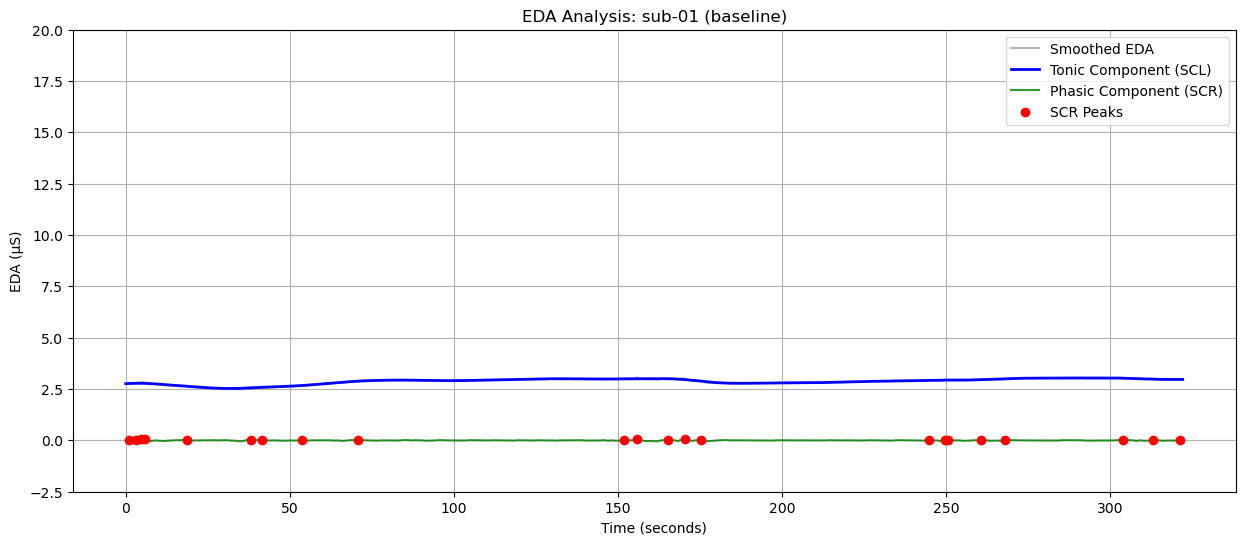

Plot saved to /Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/Baseline/EDA_sub-01_baseline.png

Processing sub-02 - baseline
Data length: 2816 samples (281.6 seconds)
Number of SCR peaks detected: 7
Mean SCR amplitude: 0.0406


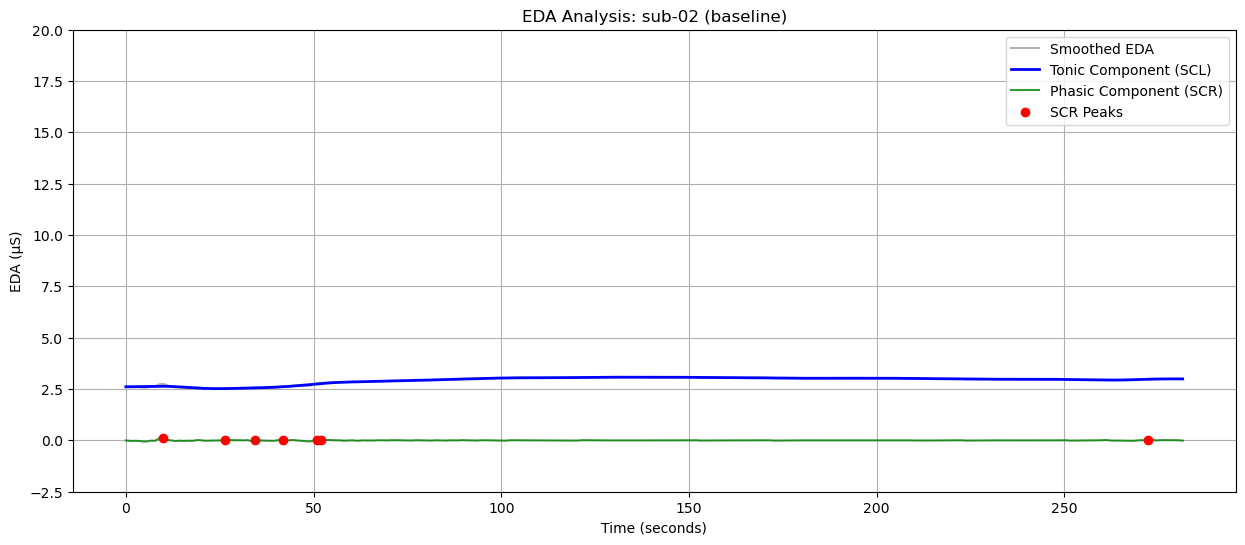

Plot saved to /Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/Baseline/EDA_sub-02_baseline.png

Saving processed baseline data...
CSV file saved to /Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/Baseline/baseline_eda_results.csv
Baseline processing complete!


In [6]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt
import os
import pickle

# Verzeichnisse für die Daten und Ergebnisse
raw_data_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/'
output_plot_dir = "/Users/luca/Downloads/GitHub/Team_U-bahn/results/EDA/Baseline"
derivative_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/'
os.makedirs(output_plot_dir, exist_ok=True)

# Funktion für den Low-Pass-Filter
def low_pass_filter(data, cutoff, fs, order=4):
    """Apply low-pass Butterworth filter"""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# File path
output_filename = f"{derivative_folder}/baseline_preprocessed_eda.pkl"

# Vorverarbeitete Daten laden
print("Loading preprocessed EDA baseline data...")
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)

# Parameter
sampling_frequency = 10  # Downsampled to 10 Hz
cutoff_frequency = 0.05  # Cutoff for tonic component
peak_threshold = 0.02    # Threshold for SCR detection

# Liste für CSV-Ergebnisse
csv_data = []

# Verarbeitung der Baseline-Daten
for participant_data in loaded_data:
    participant = participant_data['participant']
    condition = participant_data['condition']
    
    # Smoothed EDA-Daten laden und NaN-Werte entfernen
    eda_data = participant_data['smoothed'].dropna().values
    time = np.arange(len(eda_data)) / sampling_frequency
    
    print(f"\nProcessing {participant} - {condition}")
    print(f"Data length: {len(eda_data)} samples ({len(eda_data)/sampling_frequency:.1f} seconds)")
    
    # 1. Tonische Komponente (SCL) extrahieren
    tonic_component = low_pass_filter(eda_data, cutoff_frequency, sampling_frequency)
    
    # 2. Phasische Komponente (SCR) extrahieren
    phasic_component = eda_data - tonic_component
    
    # 3. SCR Peaks detektieren
    peaks, _ = find_peaks(phasic_component, 
                          height=peak_threshold, 
                          distance=sampling_frequency)  # Minimum 1 Sekunde zwischen Peaks
    
    # SCR-Amplituden berechnen
    scr_amplitudes = phasic_component[peaks]
    
    # Ergebnisse speichern
    participant_data['tonic_component'] = tonic_component
    participant_data['phasic_component'] = phasic_component
    participant_data['scr_peaks'] = peaks
    participant_data['scr_amplitudes'] = scr_amplitudes
    
    print(f"Number of SCR peaks detected: {len(peaks)}")
    print(f"Mean SCR amplitude: {np.mean(scr_amplitudes):.4f}")
    
    # Daten zur CSV-Liste hinzufügen
    for peak, amplitude in zip(peaks, scr_amplitudes):
        csv_data.append({
            "Participant": participant,
            "Condition": condition,
            "SCR_Peak_Time": peak / sampling_frequency,  # In Sekunden
            "SCR_Amplitude": amplitude
        })
    
    # Ergebnisse visualisieren
    plt.figure(figsize=(15, 6))
    
    # Komponenten plotten
    plt.plot(time, eda_data, 
             label="Smoothed EDA", alpha=0.6, color='gray')
    plt.plot(time, tonic_component, 
             label="Tonic Component (SCL)", linewidth=2, color='blue')
    plt.plot(time, phasic_component, 
             label="Phasic Component (SCR)", alpha=0.8, color='green')
    plt.scatter(peaks / sampling_frequency, scr_amplitudes, 
                color="red", label="SCR Peaks", zorder=5)
    
    plt.xlabel("Time (seconds)")
    plt.ylabel("EDA (µS)")
    plt.title(f"EDA Analysis: {participant} ({condition})")
    plt.legend()
    plt.grid(True)
    plt.ylim(-2.5, 20)  # Feste y-Achsen-Grenzen
    
    # Plot speichern
    plot_filename = os.path.join(output_plot_dir, f"EDA_{participant}_{condition}.png")
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved to {plot_filename}")

# Verarbeitete Daten speichern
print("\nSaving processed baseline data...")
with open(output_filename, 'wb') as f:
    pickle.dump(loaded_data, f)

# CSV-Ergebnisse speichern
csv_filename = os.path.join(output_plot_dir, "baseline_eda_results.csv")
csv_df = pd.DataFrame(csv_data)
csv_df.to_csv(csv_filename, index=False)
print(f"CSV file saved to {csv_filename}")

print("Baseline processing complete!")
